In [29]:
import os
import glob
import datetime
import sys
import argparse
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.dates as mdates 
from matplotlib.dates import DateFormatter, MonthLocator


In [31]:
ohlc_dict = {                                                                                                             
    'open': 'first',                                                                                                    
    'high': 'max',                                                                                                       
    'low': 'min',                                                                                                        
    'close': 'last',                                                                                                    
    'volume': 'sum',
}


def agg_data(argv):
    print(argv)
    path = '/Users/Alice/Desktop/Hut_Project/HUT_USD.csv' #relative path to csv files
    path = path 
    time_agg = '5T'

    stk_df = pd.read_csv(path)
    stk_df=stk_df.drop_duplicates(subset=['date']).reset_index(drop=True)
    stk_df=stk_df.sort_values(by='date')
    stk_df['date'] = pd.to_datetime(stk_df['date'])
    stk_df=stk_df.set_index(stk_df['date']).drop(columns='date')

    df = stk_df[['open', 'high', 'low', 'close', 'volume']]

    filename = os.path.basename(path).split('.')[0]
    path = os.path.dirname(path) + '/'


    #Minute Aggregation
    if time_agg[-1] == 'T':
        stk_df_agg = df.resample(time_agg, closed='left', label='left').agg(ohlc_dict)
        stk_df_agg=stk_df_agg.between_time(start_time='06:30:00', end_time='13:00:00')
        stk_df_agg=stk_df_agg[stk_df_agg['open'].isna() == False]

        
        stk_df_agg.to_csv(path + filename + '_' + time_agg[:-1] + 'm.csv')

    #Hourly Aggregation
    if time_agg[-1] == 'h':
        stk_df_agg = df.resample(time_agg, closed='left', label='left').agg(ohlc_dict)
        stk_df_agg=stk_df_agg.between_time(start_time='06:00:00', end_time='13:00:00')
        stk_df_agg=stk_df_agg[stk_df_agg['open'].isna() == False]

        stk_df_agg.to_csv(path + filename + '_' + time_agg[:-1] + 'h.csv')

    #Daily Aggregation
    if time_agg[-1] == 'd':
        stk_df_agg = df.resample(time_agg, closed='left', label='left').agg(ohlc_dict)
        stk_df_agg=stk_df_agg[stk_df_agg['open'].isna() == False]

        stk_df_agg.to_csv(path + filename + '_' + time_agg[:-1] + 'd.csv')

    #Weekly Aggregation
    if time_agg[-1] == 'w':
        stk_df_agg = df.resample(time_agg, closed='left', label='left').agg(ohlc_dict)
        stk_df_agg.to_csv(path + filename + '_' + time_agg[:-1] + 'w.csv')



if __name__ == '__main__':
    agg_data(sys.argv)

['C:\\Users\\Alice\\anaconda3\\lib\\site-packages\\ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9011', '--control=9009', '--hb=9008', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"84997018-01bb-42ea-8b04-ea52138a82ef"', '--shell=9010', '--transport="tcp"', '--iopub=9012', '--f=C:\\Users\\Alice\\AppData\\Local\\Temp\\tmp-2972sXzhMSb4ruWX.json']


In [41]:
data = pd.read_csv('HUT_USD_5m.csv', parse_dates=['date'], index_col = ['date'])
data

,open,high,low,close,volume
date,,,,,
2021-06-14 06:30:00,4.370,4.6300,4.3000,4.4700,3818
2021-06-14 06:35:00,4.470,4.5000,4.2534,4.3025,1305
2021-06-14 06:40:00,4.315,4.4000,4.3150,4.4000,1180
2021-06-14 06:45:00,4.400,4.4429,4.3600,4.4300,1755
2021-06-14 06:50:00,4.433,4.4400,4.3200,4.3200,986
...,...,...,...,...,...
2021-10-18 12:40:00,12.000,12.0400,11.8900,11.9100,3378
2021-10-18 12:45:00,11.920,12.0100,11.9100,11.9700,3377
2021-10-18 12:50:00,11.960,12.0000,11.9100,11.9200,3516


<Figure size 1224x576 with 0 Axes>

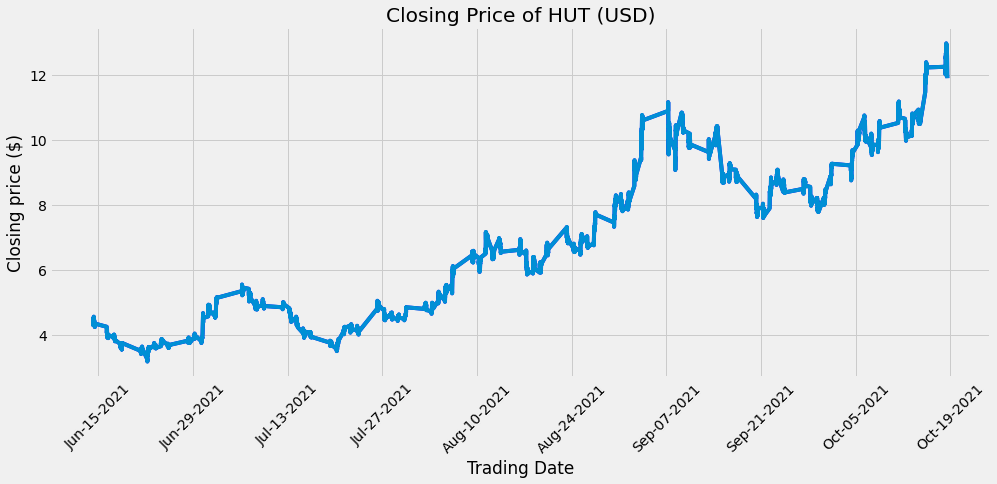

In [51]:
# Plot closing price

plt.figure(figsize=(17, 8))
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(data.index.values, data['close'], color='blue')
plt.plot(data.close)
plt.title('Closing Price of HUT (USD)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading Date')
plt.grid(True)

# Define the date format
date_form = DateFormatter("%b-%d-%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for every other week using (interval=2) 
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.show()

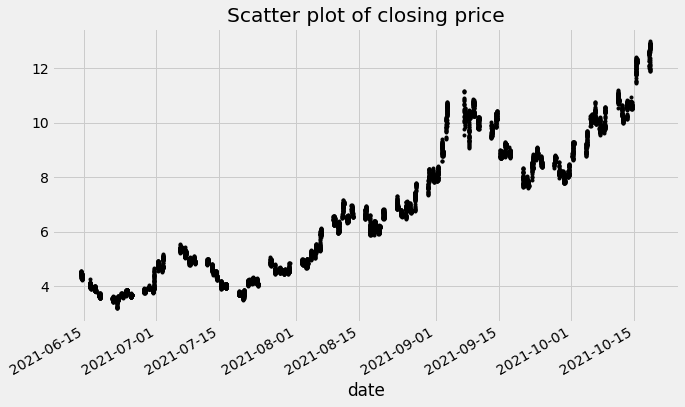

In [55]:
df_close = data['close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

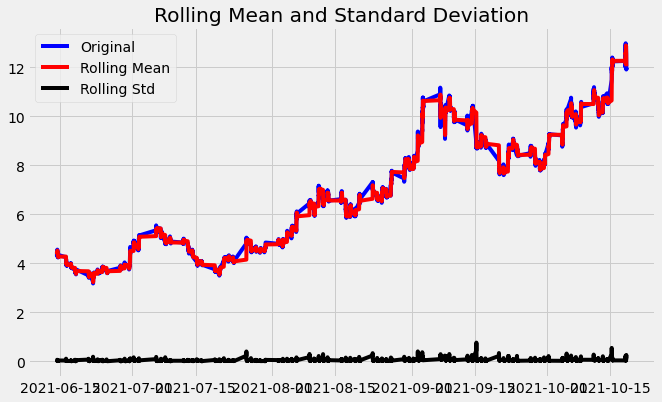

Results of dickey fuller test
Test Statistics                  -0.108881
p-value                           0.948547
No. of lags used                  0.000000
Number of observations used    6950.000000
critical value (1%)              -3.431291
critical value (5%)              -2.861956
critical value (10%)             -2.566991
dtype: float64


In [56]:
# Dickey-Fuller Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(10).mean()
    rolstd = timeseries.rolling(10).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

<Figure size 720x432 with 0 Axes>

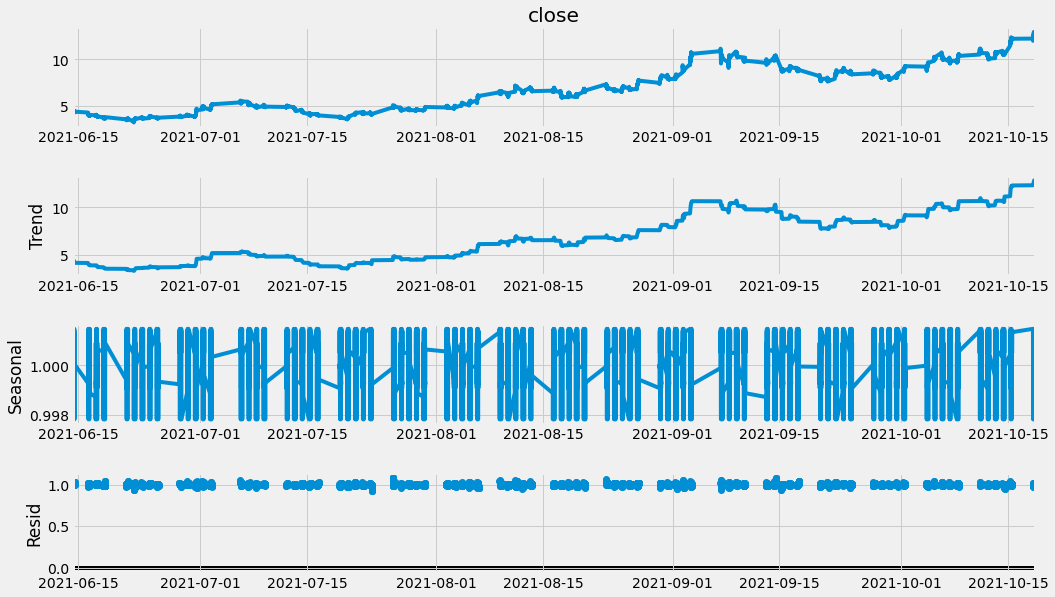

In [57]:
#separate seasonality and trend from series
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


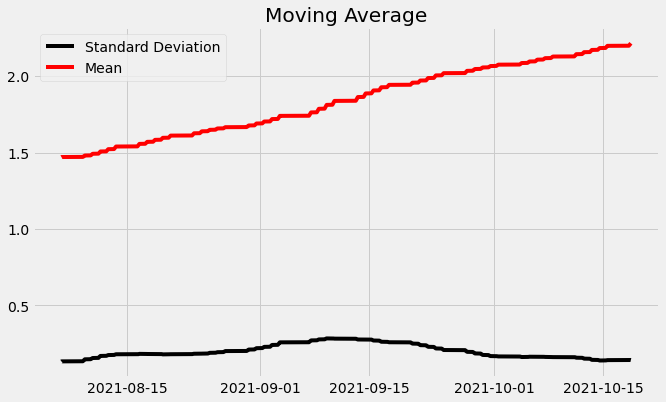

In [74]:
# p-value greater than 0.05 so we cannot reject Null hypothesis and test stat. is greater than critical values
# data is non-stationary
# Taking a log of the series to reduce magnitude of values and rising trend, then finding rolling average
# Using moving average model to smooth time series
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(3000).mean()
std_dev = df_log.rolling(3000).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

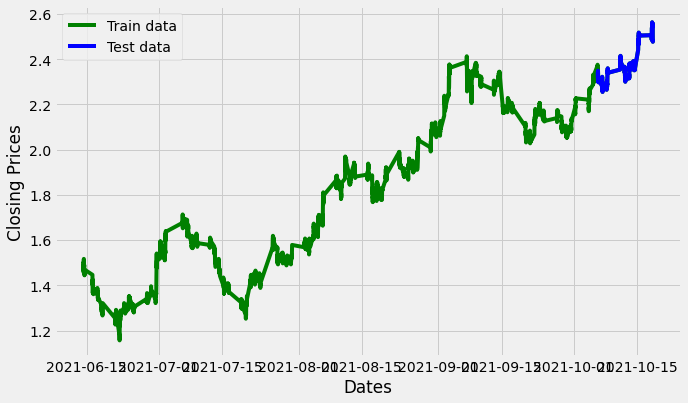

In [75]:
#split data into train and test set
# Creating ARIMA model and training it with closing price on train dataset
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [76]:
# Using Auto ARIMA to choose optimal parameters
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-42397.275, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-42396.146, Time=0.64 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-42396.186, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-42397.490, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-42392.358, Time=0.95 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.996 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6252
Model:               SARIMAX(0, 1, 0)   Log Likelihood               21199.745
Date:                Fri, 05 Nov 2021   AIC                         -42397.490
Time:                        15:29:42   BIC                         -42390.750
Sample:                             0   HQIC                        -42395.154
                               - 6252                             

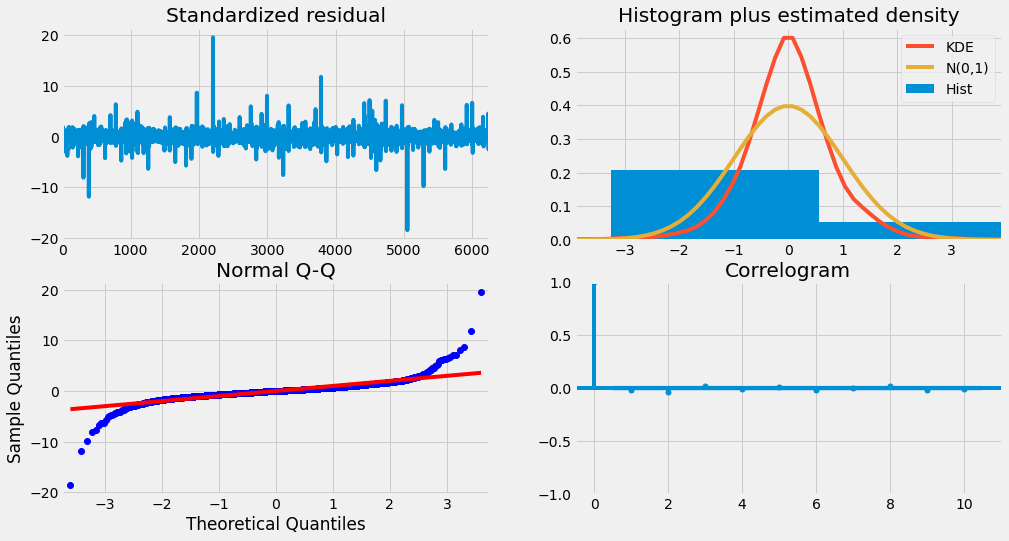

In [77]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [78]:
model = ARIMA(train_data, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 6251
Model:                 ARIMA(0, 1, 0)   Log Likelihood               21200.637
Method:                           css   S.D. of innovations              0.008
Date:                Fri, 05 Nov 2021   AIC                         -42397.275
Time:                        15:29:46   BIC                         -42383.794
Sample:                             1   HQIC                        -42392.603
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      1.336      0.182   -6.43e-05       0.000


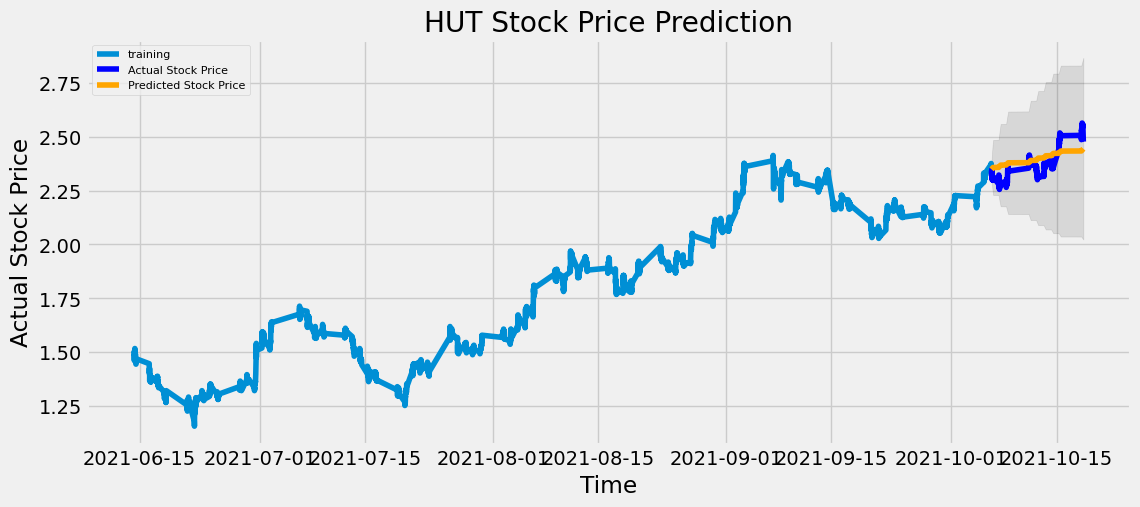

In [79]:
# Forecast
fc, se, conf = fitted.forecast(696, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('HUT Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [80]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.0042041294562715605
MAE: 0.05788349783635451
RMSE: 0.06483925860365432
MAPE: 0.0243611642490558
